In [ ]:
import gdown
## While creating link, select anyone with the link, and additionally, uc?id= should be added like in below.
url = 'https://drive.google.com/uc?id=1Wfw19aYs6Gle-jlAi41Gk3pWjlzBN7-W'
output = 'all-data.mat'
gdown.download(url, output, quiet=False)

In [1]:
from pandas import read_csv
from numpy import set_printoptions
from sklearn import datasets, linear_model
from sklearn.preprocessing import RobustScaler, MaxAbsScaler, MinMaxScaler, Normalizer, StandardScaler, QuantileTransformer

from sklearn.model_selection import train_test_split
import random
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
# import tensorflow_hub as hub
# import tensorflow_datasets as tfds

# Use GPU
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = '0'  # Set to -1 if CPU should be used CPU = -1 , GPU = 0

gpus = tf.config.experimental.list_physical_devices('GPU')
cpus = tf.config.experimental.list_physical_devices('CPU')

if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
elif cpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        logical_cpus= tf.config.experimental.list_logical_devices('CPU')
        print(len(cpus), "Physical CPU,", len(logical_cpus), "Logical CPU")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

# Setting random seeds to get same result for each run.
SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

1 Physical CPU, 1 Logical CPU


### Read Data

In [2]:
from pandas import read_csv
from numpy import set_printoptions
from sklearn import datasets, linear_model
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import random
# Using GPU
import os
import scipy.io as scpy

data = scpy.loadmat("all-data.mat")
# Extracting x_train from the mat file dictionary.
x_data = data["XTrain"]
# Extracting y_train from the mat file dictionary.
y_data = data["y_train"]
# Converting x_train and y_train to a numpy array.
x_data = np.array(x_data,dtype='float32')
y_data = np.array(y_data,dtype='float32')-1
x_temp_data=data['XTest']
y_temp_data=data['y_test']
x_temp_data=np.array(x_temp_data,dtype='float32')
y_temp_data=np.array(y_temp_data,dtype='float32')-1
# x_data=np.concatenate((x_data,x_temp_data),axis=0)
# y_data=np.concatenate((y_data,y_temp_data),axis=0)

# Verifying the shapes.
print(x_data.shape)
print(y_data.shape)

SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
# split into train test sets
x_train, x_val_to_use, y_train, y_val_to_use = train_test_split(x_data, y_data, test_size=0.3, random_state=SEED)
x_val, x_test, y_val, y_test = train_test_split(x_val_to_use, y_val_to_use, test_size=0.5, random_state=SEED)

print(f" {len(x_train), len(x_val), len(x_test)}")
print(f" {len(y_train), len(y_val), len(y_test)}")
# train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
# test_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
# BATCH_SIZE = 64
# # SHUFFLE_BUFFER_SIZE = 100
# train_dataset = train_dataset.batch(BATCH_SIZE)
# test_dataset = test_dataset.batch(BATCH_SIZE)


(15000, 1000)
(15000, 1)
 (10500, 2250, 2250)
 (10500, 2250, 2250)


### This cell is experimental for using test dataset as train dataset

In [13]:
from pandas import read_csv
from numpy import set_printoptions
from sklearn import datasets, linear_model
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import random
# Using GPU
import os
import scipy.io as scpy

data = scpy.loadmat("all-data.mat")
# Extracting x_train from the mat file dictionary.
x_data = data["XTest"]
# Extracting y_train from the mat file dictionary.
y_data = data["y_test"]
# Converting x_train and y_train to a numpy array.
x_data = np.array(x_data,dtype='float32')
y_data = np.array(y_data,dtype='float32')-1
x_temp_data=data['XTest']
y_temp_data=data['y_test']
x_temp_data=np.array(x_temp_data,dtype='float32')
y_temp_data=np.array(y_temp_data,dtype='float32')-1
# x_data=np.concatenate((x_data,x_temp_data),axis=0)
# y_data=np.concatenate((y_data,y_temp_data),axis=0)

# Verifying the shapes.
print(x_data.shape)
print(y_data.shape)

SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
# split into train test sets
x_train, x_val_to_use, y_train, y_val_to_use = train_test_split(x_data, y_data, test_size=0.3, random_state=SEED)
x_val, x_test, y_val, y_test = train_test_split(x_val_to_use, y_val_to_use, test_size=0.5, random_state=SEED)

print(f" {len(x_train), len(x_val), len(x_test)}")
print(f" {len(y_train), len(y_val), len(y_test)}")
# train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
# test_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
# BATCH_SIZE = 64
# # SHUFFLE_BUFFER_SIZE = 100
# train_dataset = train_dataset.batch(BATCH_SIZE)
# test_dataset = test_dataset.batch(BATCH_SIZE)


(1650, 1000)
(1650, 1)
 (1155, 247, 248)
 (1155, 247, 248)


In [ ]:
SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
tf.model = tf.keras.Sequential()
#### Layers :
tf.model.add(tf.keras.layers.InputLayer(input_shape=(1000,)))
## Final layer
tf.model.add(tf.keras.layers.Dense(4, activation='elu'))
tf.model.add(tf.keras.layers.Dense(3, activation='softmax'))
## RMSprop optimzer with 0.00095 learning rate gave best results for above layers.
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
tf.model.compile(loss=loss_fn, optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),  metrics=['accuracy'])
## Batch_size 512 gave best result for above layer configurations.
history = tf.model.fit(x_train, y_train, batch_size=64, epochs=100, verbose=0, validation_data=(x_test, y_test))

tf.model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4)                 4004      
                                                                 
 dense_3 (Dense)             (None, 3)                 15        
                                                                 
Total params: 4,019
Trainable params: 4,019
Non-trainable params: 0
_________________________________________________________________


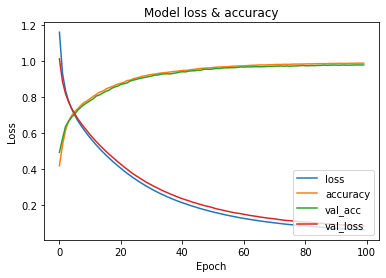

Training results
Accuracy: 0.9887619018554688
Loss: 0.06435837596654892
Evaluation results
Validation Accuracy: 0.9786666631698608
Loss: 0.08591829985380173


In [ ]:
# Plotting accuracy and loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])


plt.title('Model loss & accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy', 'val_acc', 'val_loss'], loc='lower right')



plt.show()
# accuracy!
print("Training results")
print(f"Accuracy: {history.history['accuracy'][-1]}")
print(f"Loss: {history.history['loss'][-1]}")

# evaluating model
print("Evaluation results")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]}")
print(f"Loss: {history.history['val_loss'][-1]}")

In [ ]:
print(f"X_train shape: {x_train.shape}")
print(f"Y_train shape: {y_train.shape}")

X_train shape: (10500, 1000)
Y_train shape: (10500, 1)


### Random Forest Classifier

In [5]:
from sklearn.ensemble import RandomForestClassifier
acc_arr=[]
for i in range(0,25):
    rf = RandomForestClassifier(n_estimators = i+1, random_state = 0)
    rf.fit(x_train, np.ravel(y_train))

    acc = rf.score(x_val,y_val)*100
    acc_arr.append(acc)
    print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 95.29%
Random Forest Algorithm Accuracy Score : 95.96%
Random Forest Algorithm Accuracy Score : 97.87%
Random Forest Algorithm Accuracy Score : 98.09%
Random Forest Algorithm Accuracy Score : 98.13%
Random Forest Algorithm Accuracy Score : 98.18%
Random Forest Algorithm Accuracy Score : 98.53%
Random Forest Algorithm Accuracy Score : 98.44%
Random Forest Algorithm Accuracy Score : 98.71%
Random Forest Algorithm Accuracy Score : 98.76%
Random Forest Algorithm Accuracy Score : 98.84%
Random Forest Algorithm Accuracy Score : 98.84%
Random Forest Algorithm Accuracy Score : 98.98%
Random Forest Algorithm Accuracy Score : 99.11%
Random Forest Algorithm Accuracy Score : 99.11%
Random Forest Algorithm Accuracy Score : 99.20%
Random Forest Algorithm Accuracy Score : 99.20%
Random Forest Algorithm Accuracy Score : 99.11%
Random Forest Algorithm Accuracy Score : 99.16%
Random Forest Algorithm Accuracy Score : 99.16%
Random Forest Algorithm Accuracy Score :

In [6]:
print("Max Accuracy: ",max(acc_arr))
print("Max Accuracy Index: ",acc_arr.index(max(acc_arr)))

Max Accuracy:  99.28888888888889
Max Accuracy Index:  23


In [9]:
from sklearn.datasets import make_classification
rf = RandomForestClassifier(n_estimators = (acc_arr.index(max(acc_arr))+1), random_state = 0)
rf.fit(x_train, np.ravel(y_train))

acc = rf.score(x_val,y_val)*100
acc_arr.append(acc)
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 99.29%


In [8]:
acc_val = rf.score(x_test,y_test)*100
acc_arr.append(acc)
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 99.29%


### Interesting fact about test dataset 
    Splitting the test data to train, validation and test set gives proper accuracy.

In [3]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 25, random_state = 0)
rf.fit(x_train, np.ravel(y_train))

acc = rf.score(x_val,y_val)*100
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 99.29%


In [4]:
import sklearn
import sklearn.datasets
import sklearn.ensemble
import numpy as np
import lime
import lime.lime_tabular
from __future__ import print_function
np.random.seed(1)

sklearn.metrics.accuracy_score(y_test, rf.predict(x_test))


0.9955555555555555

In [5]:
labels = ['Shear','Tensile','Mixed']
explainer = lime.lime_tabular.LimeTabularExplainer(x_train, 
class_names=labels, discretize_continuous=True)


In [8]:
i = np.random.randint(0, x_test.shape[0])
exp = explainer.explain_instance(x_test[i], rf.predict_proba, num_features=10, top_labels=1)

In [9]:
exp.show_in_notebook(show_table=True, show_all=False)

In [9]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    print(X.shape)
    print(y.shape)
    ax.scatter(x=np.linspace(0,1,X.shape[1]),y=X, c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    Z = model.predict(X)
    Z = Z.reshape(y.shape)
    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(X, y, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

In [10]:
print(x_train.shape)

(10500, 1000)


In [11]:
def evaluate_model(model, x_test, y_test):
  output_predictions =[]
  for i in range(len(x_test)):
    output_predictions.append(model.predict(x_test[i:i+1]))
  output_predictions = np.array(output_predictions)
  y_test=np.array(y_test,dtype='float32')
  output_predictions = np.reshape(output_predictions, (y_test.shape))
  accuracy = (output_predictions == y_test).mean()
  return accuracy

In [12]:
print("Accuracy of the model on test data is: ",evaluate_model(rf, x_test, y_test))

Accuracy of the model on test data is:  0.9955555555555555


### KNN Model

In [13]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = 1
knn = KNeighborsClassifier(n_neighbors)  # n_neighbors means k
knn.fit(x_train, np.ravel(y_train))
prediction = knn.predict(x_test)

print("{} NN Score: {:.2f}%".format(n_neighbors, knn.score(x_test, y_test)*100))

1 NN Score: 99.73%


In [14]:
knn.predict(x_val)

array([2., 0., 2., ..., 0., 0., 0.], dtype=float32)

In [15]:
y_train=np.ravel(y_train)
y_test=np.ravel(y_test)

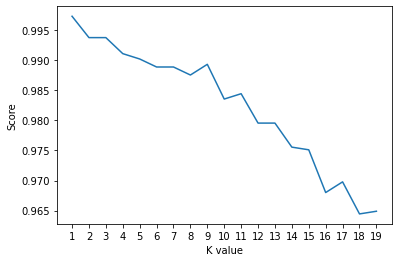

Maximum KNN Score is 99.73%


In [16]:
# try ro find best k value
accuracies = {}

scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train, y_train)
    scoreList.append(knn2.score(x_test, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

### Support Vector Machine Model

In [17]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(x_train, y_train)

acc = svm.score(x_test,y_test)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 99.82%


### Gaussian Naive Bayes Model

In [18]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

acc = nb.score(x_test,y_test)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 66.31%


### Decision Tree Classifier Model

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

acc = dtc.score(x_test, y_test)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 97.56%


[Text(0.5796398517367565, 0.9886363636363636, 'X[279] <= 1.983\ngini = 0.667\nsamples = 10500\nvalue = [3481, 3486, 3533]'),
 Text(0.2142982908341078, 0.9659090909090909, 'X[277] <= -2.286\ngini = 0.642\nsamples = 8558\nvalue = [3425, 1755, 3378]'),
 Text(0.041635687732342004, 0.9431818181818182, 'X[378] <= -0.37\ngini = 0.245\nsamples = 742\nvalue = [31, 640, 71]'),
 Text(0.02379182156133829, 0.9204545454545454, 'X[179] <= 0.293\ngini = 0.546\nsamples = 97\nvalue = [25, 13, 59]'),
 Text(0.011895910780669145, 0.8977272727272727, 'X[296] <= 0.773\ngini = 0.146\nsamples = 64\nvalue = [1, 4, 59]'),
 Text(0.005947955390334572, 0.875, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(0.017843866171003718, 0.875, 'X[364] <= 1.375\ngini = 0.033\nsamples = 60\nvalue = [1, 0, 59]'),
 Text(0.011895910780669145, 0.8522727272727273, 'gini = 0.0\nsamples = 59\nvalue = [0, 0, 59]'),
 Text(0.02379182156133829, 0.8522727272727273, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.0356877323420

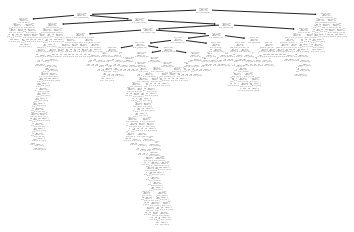

In [51]:
tree.plot_tree(dtc)


In [52]:
import graphviz

dot_data = tree.export_graphviz(dtc, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("data")

'data.pdf'

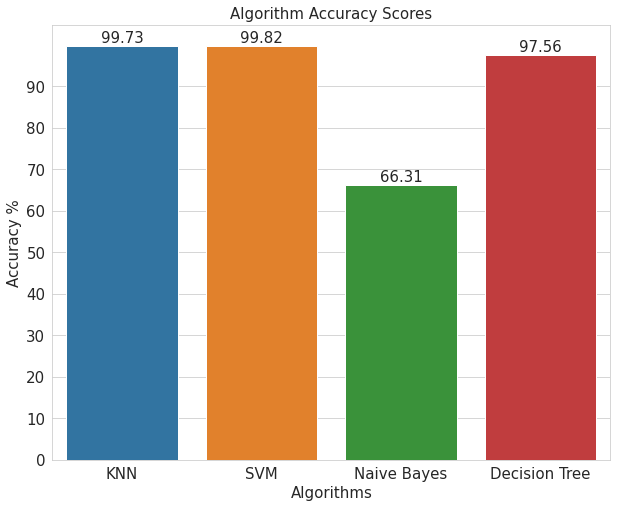

In [38]:
from turtle import width
import seaborn as sns
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
plt.yticks(np.arange(0,100,10),fontsize='15')
plt.xticks(fontsize='15')
plt.ylabel("Accuracy %", fontsize='15')
plt.xlabel("Algorithms", fontsize='15')
plt.title("Algorithm Accuracy Scores", fontsize='15')
ax=sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
ax.bar_label=ax.bar_label(ax.containers[0], fontsize='15', fmt='%.2f')
plt.show()

### Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
acc = lr.score(x_test,y_test)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 76.76%


/home/veysiadn/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
# Predicted values
y_head_lr = lr.predict(x_val)
y_head_knn = knn.predict(x_val)
y_head_svm = svm.predict(x_val)
y_head_nb = nb.predict(x_val)
y_head_dtc = dtc.predict(x_val)
y_head_rf = rf.predict(x_val)

In [41]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_val,y_head_lr)
cm_knn = confusion_matrix(y_val,y_head_knn)
cm_svm = confusion_matrix(y_val,y_head_svm)
cm_nb = confusion_matrix(y_val,y_head_nb)
cm_dtc = confusion_matrix(y_val,y_head_dtc)
cm_rf = confusion_matrix(y_val,y_head_rf)


### Plot Confusion Matrixes for each model

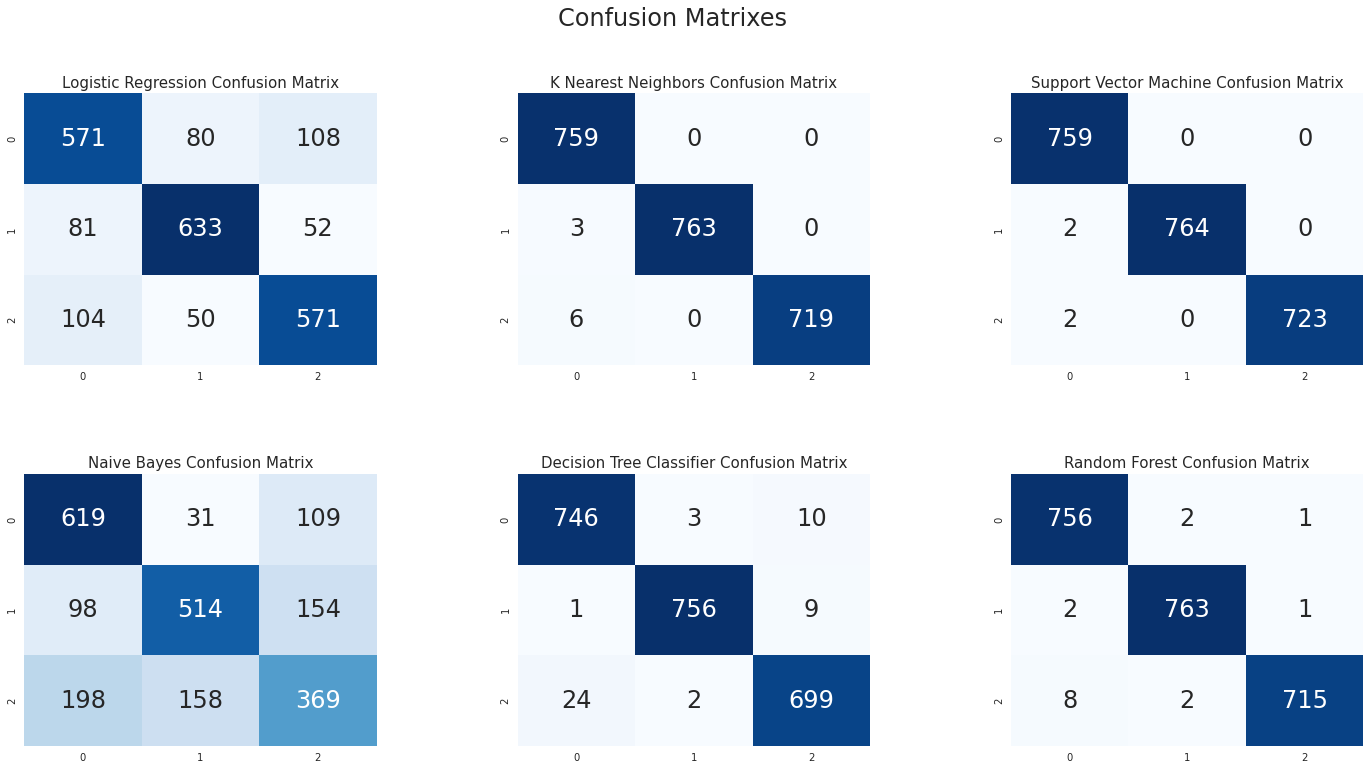

In [45]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix", fontsize=15)
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel("Overall accuracy: {:.2f}%".format(acc), fontsize=15)

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix", fontsize=15)
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix", fontsize=15)
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix", fontsize=15)
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix", fontsize=15)
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix", fontsize=15)
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

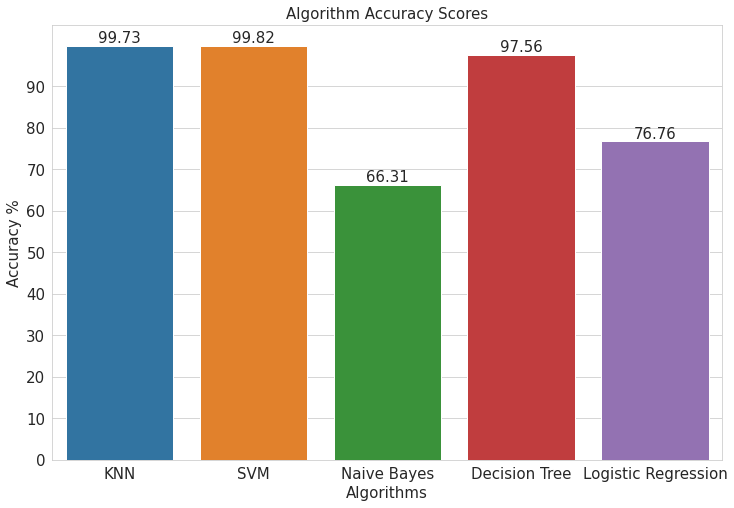

In [46]:
from turtle import width
import seaborn as sns
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(12,8))
plt.yticks(np.arange(0,100,10),fontsize='15')
plt.xticks(fontsize='15')
plt.ylabel("Accuracy %", fontsize='15')
plt.xlabel("Algorithms", fontsize='15')
plt.title("Algorithm Accuracy Scores", fontsize='15')
ax=sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
ax.bar_label=ax.bar_label(ax.containers[0], fontsize='15', fmt='%.2f')
plt.show()